# Bienvenidos a la septima práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

# Atractor de Lorenz


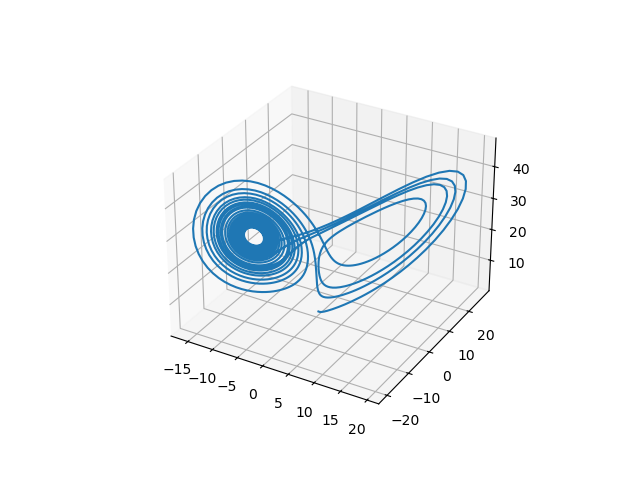

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def f(u, t, s=10, r=28, b=8/3): #valores dados en el enunciado
    x, y, z = u
    return np.array([s*(y-x), r*x-y-x*z, x*y-b*z])


h = 0.01
t = np.arange(0, 20.0, h)

u = np.empty([t.size, 3])
u[0] = [0.0, 1.0, 1.05]  #valores dados en el enunciado para (x, y, z)

for n in range(t.size-1):
    K1 = f(u[n], t[n])
    K2 = f(u[n]+0.5*h*K1, t[n]+0.5*h)
    K3 = f(u[n]+0.5*h*K2, t[n]+0.5*h)
    K4 = f(u[n]+h*K3, t[n])

    u[n+1] = u[n] + (h/6)*(K1 + 2*K2 + 2*K3 + K4)


#Ahora graficaremos en 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(u[:,0],u[:,1],u[:,2])
# plt.plot(t, u[:,0])
# plt.plot(t, u[:,1])
# plt.plot(t, u[:,2])
plt.show()


# Problema 3 cuerpos

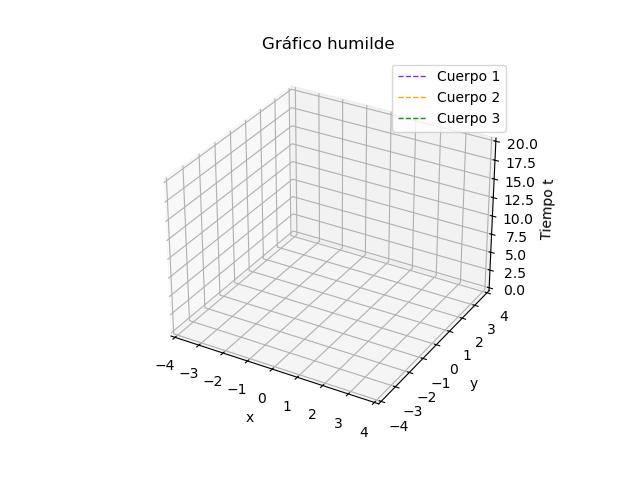

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

### CONDICIONES INICIALES ###
h = 0.005
tf = 20.0
t = np.arange(0, tf, h)
pasos = len(t)
G = -1.0  
m1, m2, m3 = 1.0, 1.0, 1.0  


#Condiciones iniciales infinito
R = np.array([
    [0.97000436, -0.24308753],
    [-0.97000436, 0.24308753],
    [0.0, 0.0]
])

V = np.array([
    [0.93240737 / 2, 0.8643146 / 2],
    [0.93240737 / 2, 0.8643146 / 2],
    [-0.93240737, -0.8643146]
])


# # Condiciones iniciales circulitos
# R = np.array([
#     [2.0, 0.0],
#     [-1.0, 1.732050808],
#     [-1.0, -1.732050808]
# ])

# V = np.array([
#     [0.0, -0.5372849659 ],
#     [0.4653024296, 0.2685424830],
#     [-0.4653024296, 0.2685424830]
# ])

#############################################################################



def F(ri, rj, mi, mj):                         
    r = ri - rj
    distance = np.linalg.norm(r)
    if distance == 0:
        return np.zeros_like(ri)
    fuerza = G*mi*mj / distance**3 * r       
    return fuerza

### DEFINIMOS LAS DERIVADAS ###
def d(R, V):
    r1, r2, r3 = R
    v1, v2, v3 = V
    
    F12 = F(r1, r2, m1, m2)
    F13 = F(r1, r3, m1, m3)
    F23 = F(r2, r3, m2, m3)
    
    a1 = (F12 + F13) / m1
    a2 = (-F12 + F23) / m2
    a3 = (-F13 - F23) / m3
    
    return np.array([v1, v2, v3]), np.array([a1, a2, a3])



### RUNGE-KUTTA DE 4TO ORDEN ###
def rk4(R, V):
    k1_v, k1_a = d(R, V)
    k2_v, k2_a = d(R + k1_v * h / 2, V + k1_a * h / 2)
    k3_v, k3_a = d(R + k2_v * h / 2, V + k2_a * h / 2)
    k4_v, k4_a = d(R + k3_v * h, V + k3_a * h)
    
    Rrk4 = R + h / 6 * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    Vrk4 = V + h / 6 * (k1_a + 2 * k2_a + 2 * k3_a + k4_a)
    
    return Rrk4, Vrk4



### ANIMACIÓN ###

R_animacion = np.zeros((pasos, 3, 2))

for i in range(pasos):
    R_animacion[i] = R
    R, V = rk4(R, V)


## FORMA DE LA GRÁFICA ##
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #projection 3d ayuda a que sea un gráfico tridimensional
ax.set_xlim([-4, 4])    #límites de la gráfica
ax.set_ylim([-4, 4])
ax.set_zlim([0, tf])

ax.set_title("Gráfico humilde")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Tiempo t")


trayectoria_1, = ax.plot([], [], [], 'blueviolet', lw=1, linestyle='--')
trayectoria_2, = ax.plot([], [], [], 'orange', lw=1, linestyle='--')
trayectoria_3, = ax.plot([], [], [], 'forestgreen', lw=1, linestyle='--')


def init():                             #La función init inicializa como líneas vacías sus variables
    trayectoria_1.set_data([], [])
    trayectoria_1.set_3d_properties([])
    trayectoria_2.set_data([], [])
    trayectoria_2.set_3d_properties([])
    trayectoria_3.set_data([], [])
    trayectoria_3.set_3d_properties([]) 
    return trayectoria_1, trayectoria_2, trayectoria_3
    


def update(frame):                                   #La función update guarda datos en las variables inicializadas para cada frame
    trayectoria_1.set_data(R_animacion[:frame, 0, 0], R_animacion[:frame, 0, 1])
    trayectoria_1.set_3d_properties(t[:frame])
    trayectoria_2.set_data(R_animacion[:frame, 1, 0], R_animacion[:frame, 1, 1])
    trayectoria_2.set_3d_properties(t[:frame])
    trayectoria_3.set_data(R_animacion[:frame, 2, 0], R_animacion[:frame, 2, 1])
    trayectoria_3.set_3d_properties(t[:frame])
    
    return trayectoria_1, trayectoria_2, trayectoria_3


ani = FuncAnimation(fig, update, frames=range(0, pasos, 10), init_func=init, blit=True, interval=50)


plt.legend(['Cuerpo 1','Cuerpo 2','Cuerpo 3'])
plt.show()
